# Linear Regression Using Gradient Descent


Linear regression is used for finding linear relationship between target and one or more predictors.

let's look at our data first

In [93]:
import pandas as pd
import numpy as np
import seaborn as sns
sns.set_theme(style="darkgrid")
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

In [94]:
data = pd.read_csv("weight-height.csv")

In [95]:
data.head()

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801


In [96]:
data.shape

(10000, 3)

let's consider height as our target and weight as out feature for now.

In [97]:
#considering only 100 points for easy analysis
data_2 = data.drop('Gender', axis = 1)[:100]

In [98]:
data_2.head()

,Height,Weight
0,73.847017,241.893563
1,68.781904,162.310473
2,74.110105,212.740856
3,71.730978,220.042470
4,69.881796,206.349801


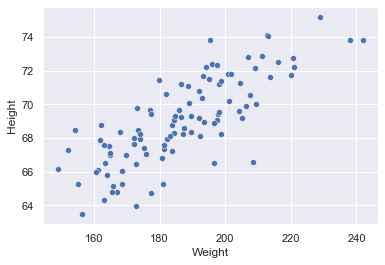

In [99]:
sns.scatterplot(x = data_2['Weight'], y = data_2['Height']);

our object here is to find a linear relationship between our target - Height and out feature - weight. 
The relation ship can be expressed as

$height$ = $\omega \ * weight $ + $\omega_o$ 

or

$y$ = $\omega * x$ + $\omega_o$ 

which is same as the equation of a line, there we need to find a line that best fits the data by selecting different values of $\omega $ (slope) and $\omega_o$ (interscept)


Let's try to plot the line by choosing few values of $\omega $ and $\omega_o$ 

In [100]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data_2)

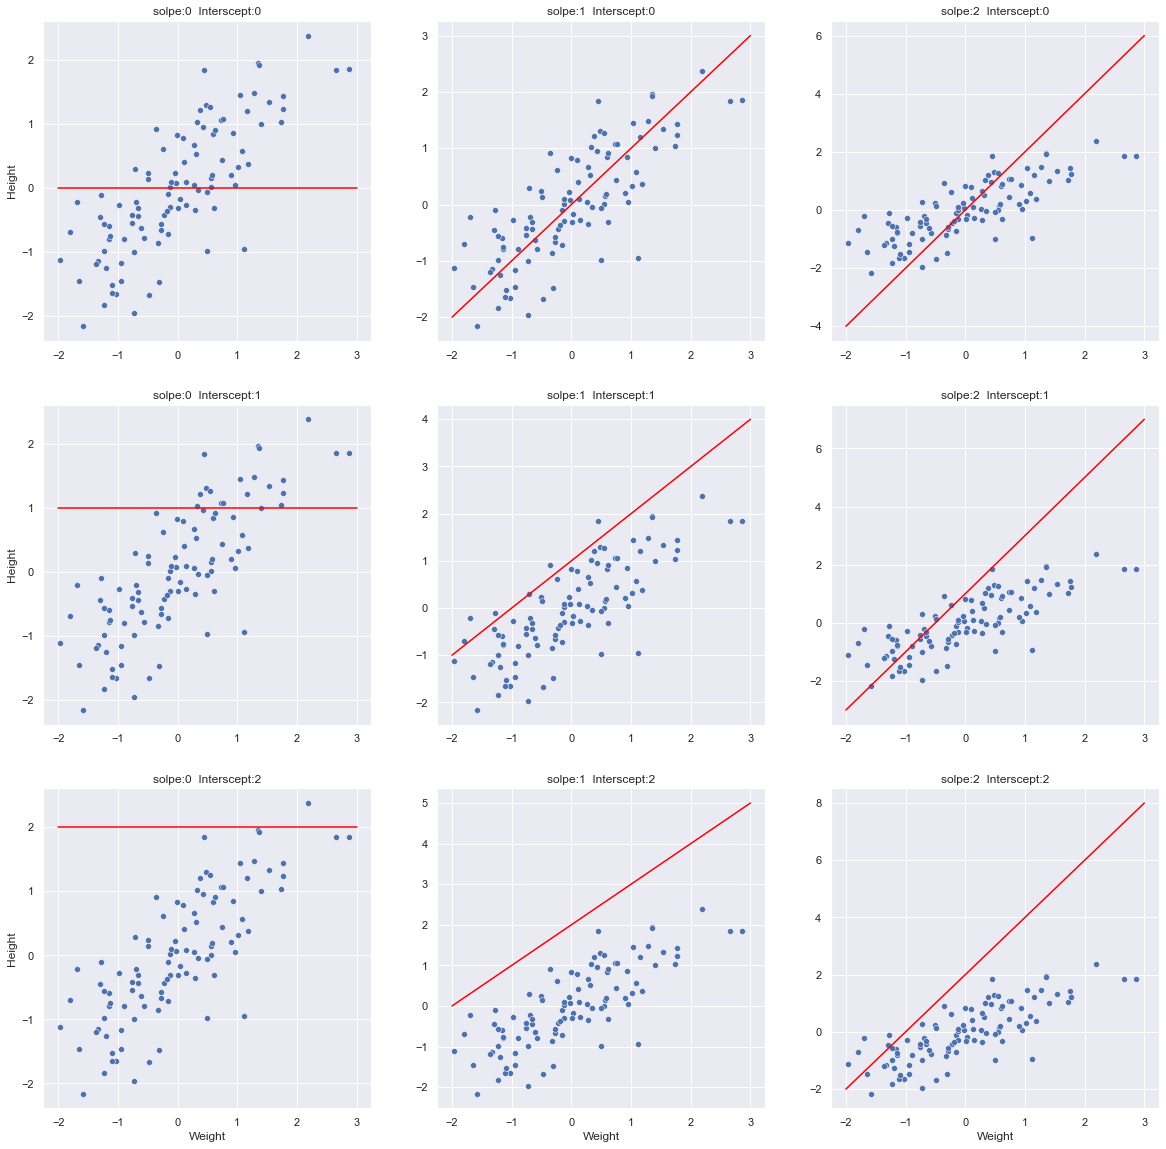

In [101]:
y_ = scaled_data.T[0]
x_ = scaled_data.T[1]
X = np.linspace(-2, 3, 100)
fig, ax = plt.subplots(3, 3, figsize=(20, 20))
for i in range (0, 3):
    for j in range (0, 3):
        Y = j*X+i
        sns.scatterplot(ax=ax[i][j], x=x_, y=y_);
        sns.lineplot(ax=ax[i][j], x=X, y=Y, color='red');
        ax[i][j].set_title(f"solpe:{j}  Interscept:{i}")
        ax[i][0].set_ylabel( "Height")
        ax[2][j].set_xlabel( "Weight")
    

now lets choose the line with $ \omega = 2 $ and $ \omega_o = 1 $

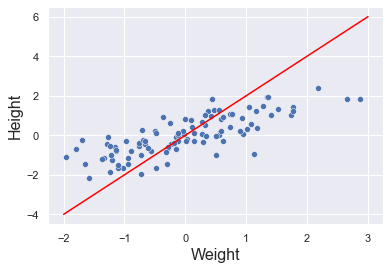

In [102]:
Y = 2*X+0
sns.scatterplot(x=x_, y=y_);
sns.lineplot(x=X, y=Y, color='red');
plt.xlabel("Weight", fontsize=16);
plt.ylabel("Height", fontsize=16);

as we can see there are a lot of point which does not lie on the line, these are errors. for simplicity let's take any two such point $ x_1 $ and $ x_2 $ for these point according to our best fit line the output should have been $ \hat y_1 $ and $ \hat y_2  $ but as we can see actual height value is $ y_1 $ and $ y_2 $ 

Text(-20, 40, 'Error')

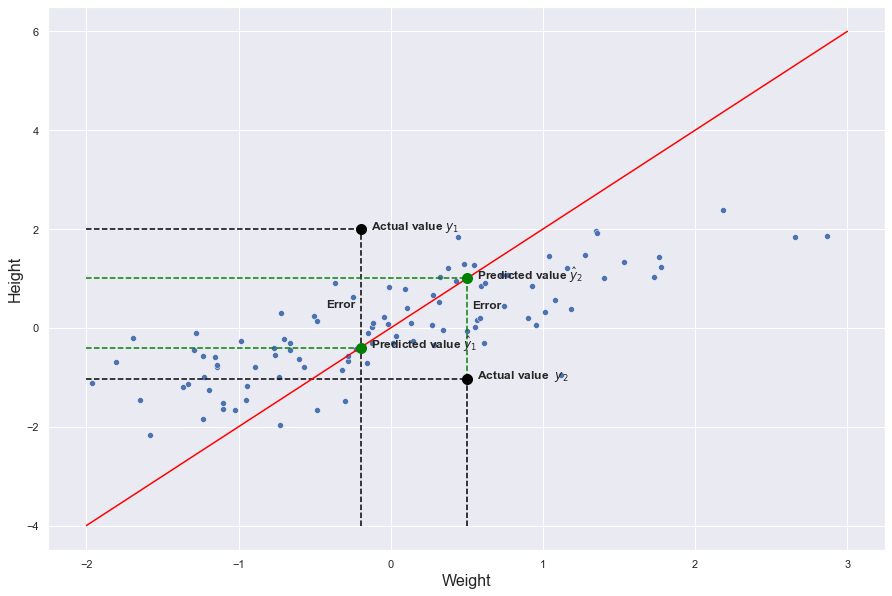

In [103]:
fig = plt.subplots(figsize=(15, 10))
sns.scatterplot(x=x_, y=y_);
sns.lineplot(x=X, y=Y, color='red');
x1 = -0.1989432
y1 = 2 
x2 = 0.50000164
y2 = -1.02679815
plt.plot(x1, y1, c='black',  marker='.', markersize=20);
plt.plot(x2, y2, c='black',  marker='.', markersize=20);

plt.vlines(x2, -4, y2, linestyle="dashed", colors='black');
plt.hlines(y2, -2, x2, linestyle="dashed", colors='black');

plt.vlines(x1, -4, y1, linestyle="dashed", colors='black');
plt.hlines(y1, -2, x1, linestyle="dashed", colors='black');

y_1hat = 2*x1+0
y_2hat = 2*x2+0

plt.vlines(x2, y2, y_2hat, linestyle="dashed", colors='green');
plt.hlines(y_2hat, -2, x2, linestyle="dashed", colors='green');
plt.plot(x2, y_2hat,  marker='.', markersize=20, c='green');
plt.annotate("   Actual value $\ y_2$", (x2, y2), weight="bold")
plt.annotate("   Predicted value $ \hat y_2$", (x2, y_2hat), weight="bold")
plt.annotate("Error", (x2,y_2hat), textcoords="offset points", xytext=(20,-30), ha='center', weight="bold")

plt.hlines(y_1hat, -2, x1, linestyle="dashed", colors='green');
plt.plot(x1, y_1hat, c='green', marker='.', markersize=20);
plt.xlabel("Weight", fontsize=16);
plt.ylabel("Height", fontsize=16);
plt.annotate("   Actual value$\ y_1$", (x1, y1),weight="bold")
plt.annotate("   Predicted value $ \hat y_1$", (x1, y_1hat), weight="bold")
plt.annotate("Error", (x1,y_1hat), textcoords="offset points", xytext=(-20,40), ha='center', weight="bold")

as we can see from the above plot that the error in our prediction is 

$ E_1 = y_1 - \hat y_2$  and $E_2 = y_1 - \hat y_2 $  

to avoid dealing with Negative values we can square the error without any change in the outcome, therefore error becomes

$ E_1 = (y_1 - \hat y_2) ^2$  and $E_2 = (y_1 - \hat y_2) ^2 $  

the same arugument can be extended to all the points which don't lie on our best fit line

$ E_3 = (y_3 - \hat y_3) ^2$ , $E_4 = (y_4 - \hat y_4) ^2 .....$  

we can obtain total error by adding all the errors

$ E_T = \sum_{n=1}^{N}  (y_n - \hat y_n) ^2 $


# Optimization Problem

now of task is to somehow reduce the total error 

$ E_T = \sum_{n=1}^{N}  (y_n - \hat y_n) ^2 $

we know that the equation of a line is

$ \hat y =  \omega * x +  \omega_o $

therefore our error becomes

$ E_T = \sum_{n=1}^{N}  (y_n -  (\omega * x_n +  \omega_o)) ^2 $

now our optimization problem reduces to selecting $ \omega $ and $ \omega_o $ such that our total error becomes minimum

Let's us plot and see how the error changes with different values of slope $ \omega$ and intercept $ \omega_o$

In [104]:
w = np.linspace(-10, 10, 100)
w_o = np.linspace(-10, 10, 100)
w, w_o = np.meshgrid(w, w_o)
error = (y_ - (np.dot(w.T,x_) + w_o))**2
error = scaler.fit_transform(error)

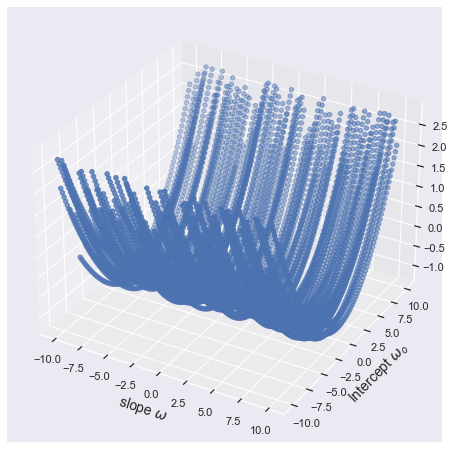

In [105]:
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter3D(w, w_o, error)
plt.xlabel("slope $ \omega$", fontsize=14);
plt.ylabel("Intercept $ \omega_o$", fontsize=14);
plt.show()

# Gradient Descent 

Gradient Descent is an optimization algorithm. we will use it to find optimal slope and intercept

Optization problem : $ E_t = \sum_{n=1}^{N}  (y_n -  (\omega * x_n +  \omega_o)) ^2 $ 

To find its minima we that the partial derivate of the error function wrt $\omega $ and $ \omega_o$

$ \Large\frac{\partial E_t}{\partial \omega}$ = $ -2 *  \sum_{n=1}^{N} x_n * (y_n -  (\omega * x_n +  \omega_o)) $

$ \Large\frac{\partial E_t}{\partial \omega_o}$ = $ -2 *  \sum_{n=1}^{N} (y_n -  (\omega * x_n +  \omega_o)) $

this is called **Gradient**

now we try to find the value of $\omega $ and $ \omega_o$ for which this gradient becomes zero or tends to zero and for this we will start with a random initial value of $\omega $ and $ \omega_o$ and then try to descend to the lowest point of this gradient

In [255]:
w, w_o = 6, 5

to descent the gradient we try changing $ \omega $ and $ \omega_o$ simultaneously to arrive at a value for which our error is minimum. For this we choosing a learning rate $Lr$ which will change the values of $ \omega $ and $ \omega_o$.

For each iteration we calculate the $ \large\frac{\partial E_t}{\partial \omega}$ and $ \large\frac{\partial E_t}{\partial \omega_o}$, then to get new
$ \omega $ and $ \omega_o$ we use the formula

$ \omega' $  = $ \omega $  - $ \large\frac{\partial E_t}{\partial \omega}$ * $Lr$

$ \omega_o' $ = $ \omega_o$ - $ \large\frac{\partial E_t}{\partial \omega_o}$ * $Lr$

In [256]:
x, y = x_, y_ 
Lr = 0.0001
slope = []
intercept = []
error = []
j = []
i = 0
while i < 1000:
    j.append(i)
    slope.append(w);
    intercept.append(w_o)
    e = np.sum((y - (w*x + w_o))**2)
    error.append(e)
    dw = -2*np.sum(x*(y - (w*x+w_o)))
    dw_o = -2*np.sum((y - (w*x+w_o)))
    w = w - dw*Lr
    w_o = w_o - dw_o*Lr
    i = i+1

now let's see how many iteration we need to minimize the error

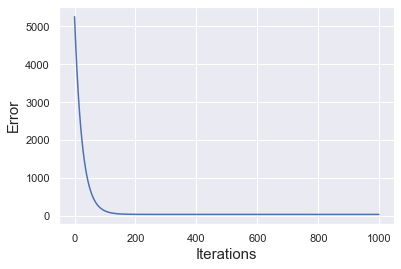

In [257]:
sns.lineplot(x = np.array(j), y = np.array(error));
plt.xlabel("Iterations",fontsize=15);
plt.ylabel("Error", fontsize=15);

In [258]:
w, w_o

(0.7883058588027316, 8.414840051273432e-09)

In [259]:
 print(f"best Fit Line has slope = {w} and intercept =  {w_o}")

best Fit Line has slope = 0.7883058588027316 and intercept =  8.414840051273432e-09


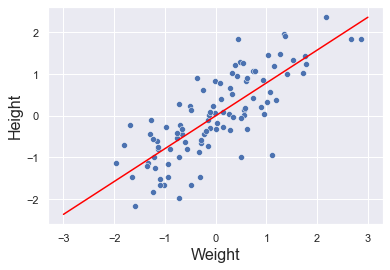

In [260]:
X = np.linspace(-3, 3, 100)
Y = w*X+w_o
sns.scatterplot(x=x, y=y);
sns.lineplot(x=X, y=Y, color='red');
plt.xlabel("Weight", fontsize=16);
plt.ylabel("Height", fontsize=16);